Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 02: Basic statistics

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, April 30, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet you will have to work with ```pandas``` and ```seaborn```. ```pandas``` is one of the most preferred and widely used tools in data processing. What’s cool about ```pandas``` is that it takes data (like a CSV or TSV file, or a SQL database) and creates a Python object with rows and columns called 'data frame' that looks very similar to tables in a statistical software (think Excel or SPSS for example). ```pandas``` makes data processing a lot easier in comparison to working with lists and/or dictionaries through for-loops or list comprehension.  
```seaborn``` is a library for making plots. It is based on ```matplotlib``` but offers more functions speicialized for statistical visualization. Also most people agree that ```seaborn``` looks more legit.

Don't forget that you we will also give **2 points** for nice coding style!

## Assignment 0: Peer review for sheet 01 [3 pts]

Beginning this week you will have to make a peer review of the other groups' solutions. Each group reviews the solutions of two other groups and give points according to the given point distribution considering the correctness of the solution. For this reviews the tutors will give you up to 3 points each week.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 10, 7 | 4, 9  | 1, 4  | 11, 1 | 8, 11 | 5, 3  | 9, 10 | 6, 5  | 3, 2  | 2, 8   | 7, 6   |

You should open an issue in repositories of groups you have to check. The title of the issue should be your group name (e.g."Group 1"). Comments on what was good and bad, how much points they get etc.  
Refer to https://guides.github.com/features/issues/ to learn more about issues.

## Assignment 1: Dataframes [4 pts]

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

```matplotlib``` and ```seaborn``` should already be installed in your environment. If not please run:
```sh
pip install seaborn
```

### a) Importing a csv file [2 pts]

Import the csv files of all subjects into one dataframe. Make sure that each row has a unique index. You might want to take a look at what ***pandas.concat*** does.<br>
Extra fun: Display the output of the dataframe using the ***pandas.set_option*** function to display the data in a well-arranged way. Play a little bit around with the settings that you are allowed to change.<br>
Save ```df_concatenated```.


In [3]:
import glob
import os

PATH = os.getcwd()+ "/Data"
all_files = glob.glob(os.path.join(PATH, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent
                                                       # http://www.oipapio.com/question-88634

#iterates through files in all_files list and creates a dataframe each
df_to_concat = [pd.read_csv(f) for f in all_files]
#iterates through list of dataframes and modifies subjectIDs
for x, count in zip(df_to_concat, range(1, len(df_to_concat)+1)):
    x['SubjectID'].replace(x['SubjectID'], count, inplace=True)

df_concatenated = pd.concat(df_to_concat, axis=0, ignore_index = True)
print("df_concatenated: \n", df_concatenated)

#some display settings to make it look nice (not all data will be displayed), only 10 rows
pd.set_option('display.max_rows', 10)

# save concatenated dataframe
DATAPATH = os.path.join(os.getcwd(),'Processed', 'data_concatenated.csv')
# making sure that directory exists
if not os.path.isdir(os.path.join(os.getcwd(), 'Processed')):
    os.mkdir(os.path.join(os.getcwd(), 'Processed'))

# safe concatenated file 
df_concatenated.to_csv(DATAPATH)

df_concatenated: 
      SubjectID  StimulusType  response   RT
0            1             1         1  418
1            1             0         1  269
2            1             1         1  606
3            1             1         1  333
4            1             1         1  430
..         ...           ...       ...  ...
595          6             1         1  390
596          6             1         1  289
597          6             1         1  406
598          6             1         1  407
599          6             1         1  356

[600 rows x 4 columns]


### b) Working with dataframes [2 pts]

- Add a column called "congruence" to ```df_concatenated```. The column should have a value *True* if "StimulusType" and "reponse" matches. Otherwise the column should have a value *False*.

- Create a new dataframe which has "SubjectID","StiumulusType","RT" and "congruence" as a column. For each combination of "SubjectID" and "StimulusType" (e.g. "7001" and "0") compute the average RT and congruence level.

- When computing the average RT, omit all reaction times which are 0 as these will manipulate the mean.

- Rename "congruence" as "accuracy" and save the dataframe as a csv file. 

In [4]:
#add a column "congruence" that has value true if Stimulus and response hold the same value
df_concatenated['congruence'] = (df_concatenated['StimulusType'] == df_concatenated['response'])

#create a new dataframe with averaged data
#create columns
df_concatenated_avg = pd.DataFrame(columns=['SubjectID', 'StimulusType', 'RT', 'congruence'])

#group dataframe by SubjectID and StimulusType (for each Subject we have 2 types of Stimuli 0 - 1)
grouped = df_concatenated.groupby(['SubjectID','StimulusType'])

#helper for adding rows to dataframe
row = 0

#we have 2 groups per subject (one group with stimulus 0 and one with stimulus 1)
#thus the number of subjects is half the number of created groups
for subject in range(1, (len(grouped)//2)+1):
    #for each subject there are two groups / stimulus conditions
    for stimType in range(2):
        #get the groups with current subject index and stimulus Type
        group = grouped.get_group((subject,stimType))
        #computing the mean of the reaction time
        #the zeros have to be replaced since we don't want them to manipulate the mean
        meanRT = group.RT.replace(0, np.NaN).mean()
        #computing the congruence mean
        meanCongruence = group.congruence.mean()
        #if all reaction time values are zero, the mean will be NaN due to our conversion measure
        #thus we have to replace the NaN value with zero again since we only want numeric values
        if(np.isnan(meanRT)):
            meanRT = 0
        #adding the new row to the dataframe while rounding the mean to 2 digits after the decimal point
        df_concatenated_avg.loc[row] = [subject, stimType, round(meanRT,2), meanCongruence]
        #increasing the row index to make sure that new rows are added while looping through the loops
        row = row + 1

#renaming the column called congruence to accuracy
df_concatenated_avg.rename(columns={'congruence':'accuracy'}, inplace=True)

print(df_concatenated_avg)

# save averaged dataframe
DATAPATH = os.getcwd() + '/Processed/data_concatenated_averaged.csv'
df_concatenated_avg.to_csv(DATAPATH)

    SubjectID  StimulusType      RT  accuracy
0         1.0           0.0  316.67      0.85
1         1.0           1.0  357.00      1.00
2         2.0           0.0  263.45      0.45
3         2.0           1.0  343.05      1.00
4         3.0           0.0  181.00      0.85
5         3.0           1.0  330.24      1.00
6         4.0           0.0  339.00      0.95
7         4.0           1.0  339.01      1.00
8         5.0           0.0  271.00      0.95
9         5.0           1.0  299.06      1.00
10        6.0           0.0  254.00      0.90
11        6.0           1.0  311.38      1.00


## Assignment 2: Statistical plotting [6 pts]

### a) Boxplot and Violinplot [2 pts]

Plot the RT of each trial for all subjects as a stripplot and a boxplot on top of each other. Do the same with a striplot and a violinplot. Plot go trials as green dots and no-go trails as red dots. Reminder: don't forget to mask the data where RT=0. Make sure that the legends are informative (Don't display duplicated legends).

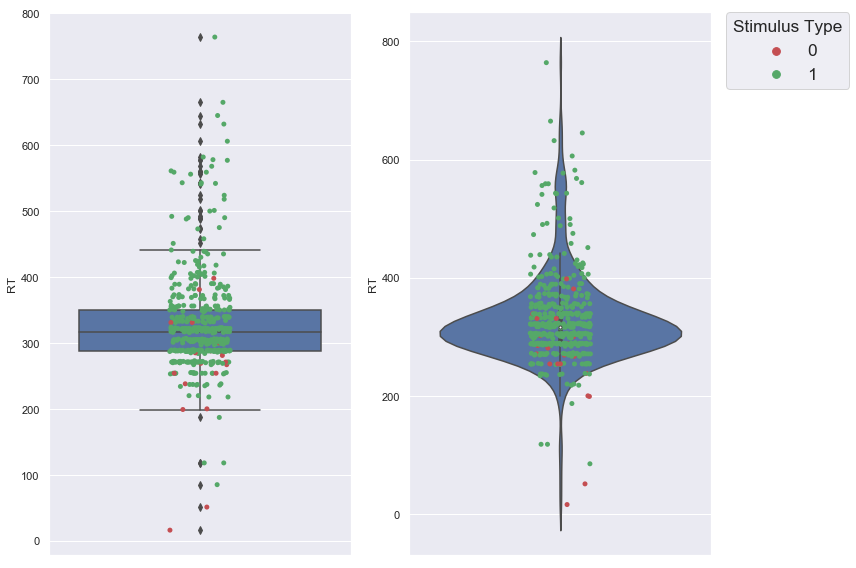

In [101]:
# read data
data_concat = pd.read_csv(os.getcwd() + "/Processed/data_concatenated.csv")
#print(data_concat)
# create two axes
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,8))

# first subplot with stripplot and boxplot    
data_concat['RT'] = data_concat['RT'].replace(0, np.NaN)
data_concat['']=''

#print(data_concat)


box = sns.stripplot(x='', data = data_concat, y='RT', hue='StimulusType', palette = ['r','g'], ax=axes[0], jitter = True)
sns.boxplot(x='', y='RT', data = data_concat, ax=axes[0])

# second subplot with stripplot and violinplot
sns.stripplot(x='', y='RT', data= data_concat, hue=data_concat['StimulusType'], palette = ['r','g'], jitter = True)
sns.violinplot(y=data_concat['RT'], hue=data_concat['StimulusType'])

# handling legends
# TODO
box.legend_.remove()
handles, labels = box.get_legend_handles_labels()
legend = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Stimulus Type', fontsize = 'xx-large')
legend.get_title().set_fontsize('xx-large')


fig.tight_layout()



### b) Violinplot combining all data of all groups [3 pts]

- Make a dataframe consisting of all data across groups. You already did this in 1.a). At the end this dataframe you should have 8 * 11 * 100 rows.

- Every group has used their ID convention. Make sure that every data point follows this SubjectID system: group number + "00" + subject number.  
e.g) 3002 for the second subject of the third group.

- Compute average RT and accuaracy for each subject in the big dataframe you just created. You already did this in 1.b). At the end this dataframe will have 8 * 11 rows.

- On the first column plot average RT and accuracy for 8 subjects from your group's data. Use violinplot and split go/no-go conditions.

- On the second column plot average RT and accuracy for 80 subjects from all data. Use violinplot and split go/no-go conditions.

- Do you see any difference between the first column and the second column? What does this tell us about the central limit theorem (CLT) ?

In [44]:
# again create a concatenated dataframe over all (averaged) groups.
# Don't forget to modify the Subject ID
all_groups = []
for groupNr in range(1, 12):
    PATH = os.getcwd()+ "/experimental_Data/Group_{}".format(groupNr)
    all_files_group = glob.glob(os.path.join(PATH, "*.csv")) 
    #iterates through files in all_files list and creates a dataframe each
    df_to_concat_group = [pd.read_csv(g) for g in all_files_group]
    #iterates through list of dataframes and modifies subjectIDs
    for y, subjectNr in zip(df_to_concat_group, range(1, 9)):
        y['SubjectID'].replace(y['SubjectID'], int(str(groupNr)+"00"+str(subjectNr)), inplace=True)
        # add the created dataframe to the list for all files
        all_groups.append(y)
        
df_concatenated_all = pd.concat(all_groups, axis=0, ignore_index = True)


x: 1
x: 2
x: 3
x: 4
x: 5
x: 6
x: 7
x: 8
x: 9
x: 10
x: 11


In [91]:
#add a column "accuracy" that has value true if Stimulus and response hold the same value
df_concatenated_all['accuracy'] = (df_concatenated_all['StimulusType'] == df_concatenated_all['response'])

#print(df_concatenated_all.to_string())
#create a new dataframe with averaged data
df_concatenated_avg_all = pd.DataFrame(columns=['SubjectID', 'StimulusType', 'RT', 'accuracy'])

#group dataframe by SubjectID and StimulusType (for each Subject we have 2 types of Stimuli 0 - 1)
grouped_all = df_concatenated_all.groupby(['SubjectID','StimulusType'])

#for adding rows to dataframe
row = 0
#we have 2 groups per subject (one group with stimulus 0 and one with stimulus 1)
#thus the number of subjects is half the number of created groups
for subject in range(len(grouped_all)//2):
    #print("subject:", subject)
    #print("sub:", (subject%8)+1)
    #print("group:", (int(subject/8)+1))
    # calculate the subjectID and the group nr
    subID = (subject%8)+1
    groupNr = int(subject/8)+1
    
    #for each subject there are two groups / stimulus conditions
    for stimType in range(2):
        #print("stim:", stimType)
        #print("Total SubID:", groupNr*1000+subID,stimType)
        #get the groups with current subject index and stimulus Type
        group = grouped_all.get_group((groupNr*1000+subID,stimType))
        #computing the mean of the reaction time
        #the zeros have to be replaced since we don't want them to manipulate the mean
        meanRT = group.RT.replace(0, np.NaN).mean()
        #computing the congruence mean
        meanCongruence = group.accuracy.mean()
        #if all reaction time values are zero, the mean will be NaN due to our conversion measure
        #thus we have to replace the NaN value with zero again since we only want numeric values
        if(np.isnan(meanRT)):
            meanRT = 0
        #adding the new row to the dataframe while rounding the mean to 2 digits after the decimal point
        df_concatenated_avg_all.loc[row] = [(groupNr*1000+subID), stimType, round(meanRT,2), meanCongruence]
        #increasing the row index to make sure that new rows are added while looping through the loops
        row = row + 1
        
# Now we have for every subject the average RT and accuracy 
# We already splitted into go-/no-go trails so wie have 8 * 11 * 2 rows
print(df_concatenated_avg_all)

     SubjectID  StimulusType      RT  accuracy
0       1001.0           0.0  392.00    0.9500
1       1001.0           1.0  408.76    1.0000
2       1002.0           0.0  256.33    0.8500
3       1002.0           1.0  335.45    1.0000
4       1003.0           0.0  258.00    0.8000
5       1003.0           1.0  282.35    0.9875
6       1004.0           0.0  372.50    0.9000
7       1004.0           1.0  377.65    1.0000
8       1005.0           0.0  269.60    0.7500
9       1005.0           1.0  380.56    1.0000
10      1006.0           0.0  265.33    0.8500
11      1006.0           1.0  342.36    1.0000
12      1007.0           0.0  293.50    0.9000
13      1007.0           1.0  349.49    1.0000
14      1008.0           0.0    0.00    1.0000
..         ...           ...     ...       ...
161    11001.0           1.0  305.66    1.0000
162    11002.0           0.0  332.00    0.9500
163    11002.0           1.0  306.35    1.0000
164    11003.0           0.0  342.25    0.7500
165    11003.

In [128]:
df_concatenated_avg_all['RT'] = df_concatenated_avg_all['RT'].replace(0, np.NaN)

# our group 5 starts at 16*4 (behind group 4) and ends at 16*5 (behind group 5)
df_our_group = df_concatenated_avg_all[16*4:16*5]

# here we just take the rest 80 subjects
df_80_subs = df_concatenated_avg_all[:16*4-1].append(df_concatenated_avg_all[16*5:])


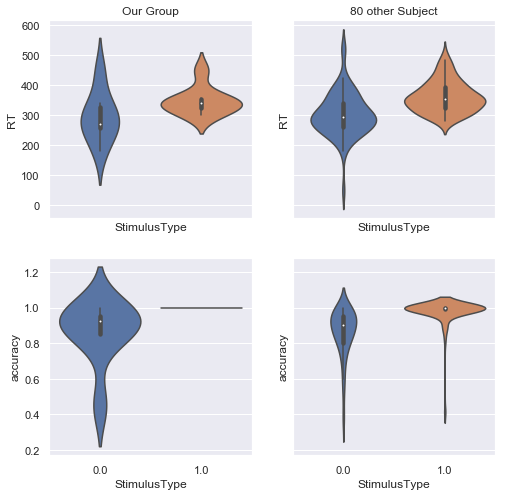

In [131]:
# Now it's time to plot your results
figs, axes = plt.subplots(nrows=2, ncols=2, sharey="row", sharex=True, figsize=(8,8))
axes = axes.flatten()

# violin plot for your group's data
axes[0].set_title("Our Group")
sns.violinplot(x=df_our_group['StimulusType'], y=df_our_group['RT'], ax=axes[0])
sns.violinplot(x=df_our_group['StimulusType'], y=df_our_group['accuracy'],ax=axes[2])

# violin plot of all group's data
axes[1].set_title("80 other Subject")
sns.violinplot(x=df_80_subs['StimulusType'], y=df_80_subs['RT'], ax=axes[1])
sns.violinplot(x=df_80_subs['StimulusType'], y=df_80_subs['accuracy'], ax=axes[3])


fig.tight_layout()


Compare two datasets and relate it with CLT. Write your opinion here.

We can see that the right side, where the data from more subjects is plotted, is more uniform distributed than the left one. The central limit theorem says that if we repeat something infinitely many, its average is distributed in a uniform fashion, no matter which form the distibution had before. 

### c) Scatterplot [1 pts]

Make a scatterplot comparing RT and accuracy. Do you see some correlation?

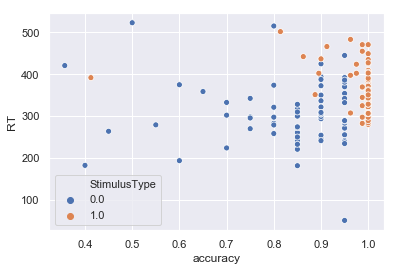

In [130]:
ax = sns.scatterplot(x=df_concatenated_avg_all['accuracy'], y=df_concatenated_avg_all['RT'], hue=df_concatenated_avg_all['StimulusType'])

We see that the reaction time is somewhat smaller if the accuracy is not that high. Meaning we have a higher reaction time if we are doing well in the task.